# 00: Basic Calculus Review

In case you haven't taken calculus, or maybe it has been a while, let's review quickly. Calculus is pretty important for statistics and machine learning, primarily because calculus helps us find $x$ values that minimize (or maximize) the $y$ value of a function. It turns out that with machine learning you often want to maximize the probability of some outcome, or minimize the error rate of your predictions.

This is particularly useful for a technique called *backpropagation*. Backpropagation is used to train neural networks and we'll learn about it later in the course.

So to get started, let's consider a quadratic function $f(x) = (x - 5)^2 + 2$. We want to find the $x$ that minimizes the value of the function $f$. Let's graph the function!

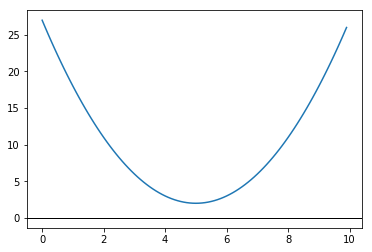

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x_values):
    return (x_values - 5) ** 2 + 2

def plot(axes, f, x_values, label = None):
    f_values = f(x_values)

    axes.plot(x_values, f_values, "-", label = label)
    axes.axhline(0, color = "black", lw = 1)

figure = plt.figure()
plot(figure.add_subplot(111), f, np.arange(0, 10, 0.1))

Maybe you can already see that the minimum occurs at $x = 5$, and that the minimum $y$ value is $2$.

Let's prove this! To do so, we need another function called the *derivative* of $f$. We denote a derivative of a function as $f'$ or sometimes $\frac{\partial f}{\partial x}$. The derivative is another function, so it can take in an $x$ value itself and produce an output $y$ value $f'(x)$.

But what *is* that output value? The goal is that it is the slope of the tangent line that just touches the function $f$ at the point $x$. A picture will speak a thousand words.

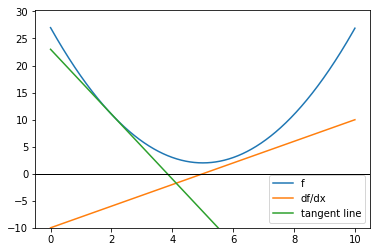

In [2]:
def df(x_values):
    return 2 * (x_values - 5)

def tangent_line(x0, x_values):
    y0 = f(x0)
    delta = (x_values - x0)
    return y0 + delta * df(x0)

figure = plt.figure()
axes = figure.add_subplot(111)

x_values = np.arange(1000) / 100
plot(axes, f, x_values, label = "f")
plot(axes, df, x_values, label = "df/dx")
plot(axes, lambda x_values: tangent_line(2, x_values), x_values, label = "tangent line")

axes.set_ylim(bottom = -10)
axes.legend()

What do we see here? We see the same parabola as before, but now we see a green tangent line that just touches the parabola at the point $(x, y) = (2, 11)$. From geometry, we know a line is defined by a point and a slope. We know that a tangent line at $x$ needs to pass through $(x, f(x))$, so the only other part we need for a tangent line is the slope. We get that slope from the derivative $f'$. On the graph above, the function $f'$ is graphed in orange. At $x = 2$, the value of $f'(x)$ is $-6$, which is the slope of the tangent line.

### Finding a maximum or minimum

Now, a *continuous* (that is, a smoothly varying) function has both a maximum and minimum value on any finite range $[a, b]$. This is called *Rolle's Theorem*, but you don't need to remember that. The maximum and minimum values always happen at one of three places: at $a$, at $b$, or at some $x_0$ where $f'(x_0) = 0$. Again, let's see a picture.

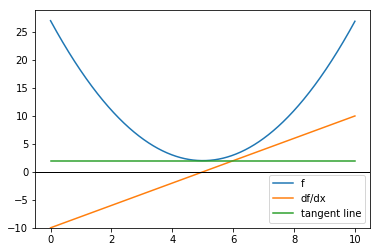

In [3]:
figure = plt.figure()
axes = figure.add_subplot(111)

x_values = np.arange(1000) / 100
plot(axes, f, x_values, label = "f")
plot(axes, df, x_values, label = "df/dx")
plot(axes, lambda x_values: tangent_line(5, x_values), x_values, label = "tangent line")

axes.set_ylim(bottom = -10)
axes.legend()

Here I've graphed the tangent line for $f$ at $x_0 = 5$. The tangent line is flat, because at precisely this minimum the slope is transitioning from negative to positive. That means the slope is zero. That means $f'(x_0) = 0$.

Calculating the derivative in this way lets us easily solve for the $x$ which minimizes $f(x)$. Below we will show that the derivative of $f(x) = (x - 5)^2 +2$ is $f'(x) = 2(x-5)$.

We want to examine points where $f'(x) = 0$. That is, we want points where $2(x - 5) = 0$. But simply by rearranging, we see that the only place the orange line is zero is at $x = 5$.

### Calculating polynomial derivatives

When taking the derivative of a function, $g(x) = ax^k$, the rule is that $g'(x) = akx^{k-1}$. The exception is $g(x) = ax^0 = a$. This is a *constant function* and the slope is everywhere zero, so $g'(x) = 0$.

The derivative of the sum of functions is the sum of their derivatives. This is called the *sum rule*. So if $g(x) = a_0 + \sum_{i = 1}^{k} a_ix^{i}$ then $g'(x) = \sum_{i = 1}^{k} a_iix^{i - 1}$. Notice that the constant term was eliminated.

### Product rule implies polynomial rule

An important rule is the *product rule*. We use it a lot. It says that

\\[
f(x) = g(x)h(x) \Rightarrow f'(x) = g'(x)h(x) + g(x)h'(x)
\\]

We won't prove the product rule ourselves. However, the idea is basically that if you multiply two functions $g$ and $h$, the rate of change of $gh$ consists of two parts. First, the rate at which $g$ is changing at $x$ ($g'(x)$) times $h(x)$. If $h(x)$ were to stay constant, it would determine how much changing $g$ could change the product. For instance, if $h(x) = 0$, changing $g$ alone won't result in any change in the product.

The second part of the overall rate of change is just the mirror image. It's the product of $g(x)$ and $h'(x)$. We add this part because there's a second part to the change of the product. It is the rate of change of $h$, again scaled by $g(x)$, which determines how much changes in $h$ can impact the overall product's rate of change.

Let's do an example. Let's say

\\[
g(x) = ax^k, \quad h(x) = x, \quad f(x) = g(x)h(x) = ax^{k+1}
\\]

Let's prove that $f'(x) = a(k+1)x^k$. That is: let's prove the polynomial rule. We'll do it using *mathematical induction*. That means we'll assume that $g'(x) = akx^{k-1}$ and $h'(x) = 1$. So then let's apply the product rule:

\\[
\begin{align}
f'(x) &= g'(x)h(x) + g(x)h'(x)\\
&= (akx^{k-1})(x) + (ax^k)(1)\\
&= akx^k + ax^k\\
&= a(k+1)x^k
\end{align}
\\]

This is exactly what the polynomial rule says! Technically we should also prove a *base case*: that the derivative of $f(x) = ax^1$ is $f'(x) = a$. But I'll leave that to you.


### Chain rule

The other important rule is the *chain rule*. We'll use this all the time. It says that

\\[
f(x) = g(h(x)) \Rightarrow f'(x) = g'(h(x))h'(x)
\\]

Let's do an example. Let's say that

\\[
g(x) = x^2 + 2, \quad h(x) = (x - 5)
\\]

Therefore we can substitute to calculate the equation for $f$:

\\[
\quad f(x) = g(h(x)) = (x - 5)^2 + 2
\\]

Now, let's find $f'$. The first step is to find $g'$ and $h'$:

\\[
g'(x) = 2x, \quad h'(x) = 1
\\]

Now let's apply the product rule to find $g'$:

\\[
f'(x) = g'(h(x))h'(x) = g'((x - 5)) \cdot (1) = 2(x - 5) \cdot (1) = 2(x - 5)
\\]

Indeed, this is the derivative of the polynomial I've graphed in orange above!

Again, we won't prove the product rule. But the intuition is this. If we change $x$, the rate of change of $f$ is equal to the rate of change of $g$ ($g'$), except we also need to add in the fact that $g$ is not a function of $x$ directly. $g$ is going to change proportional to the rate of change of $h$, which is $h'$. So the effects compound multiplicatively.

This is a very handwavy "proof", but I hope it gives some intuition.

## Local minimum/maximum vs Global minimum/maximum

Technically speaking, just because the derivative of $f$ is zero at a point does not necessarily mean it is a minimum. For one, it could instead be a maximum. Or it could be an *inflection point*: this can happen if a function's growth slows down to zero, stays at zero for one instant, and then resumes growing. Think of a "rolling" traffic stop.

Moreover, even if a value is a *local* minimum, it may not be a *global* minimum. Consider the graph of these two examples:

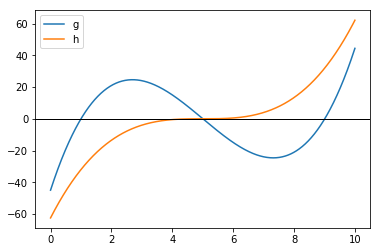

In [4]:
def g(x):
    return (x - 1) * (x - 5) * (x - 9)
def h(x):
    return 0.5 * (x - 5) ** 3

figure = plt.figure()
axes = figure.add_subplot(111)

x_values = np.arange(1000) / 100
plot(axes, g, x_values, label = "g")
plot(axes, h, x_values, label = "h")

axes.legend()

For the blue graph of $g$, you can see that there is a point $x_1$ between $2$ and $4$ where the function obtains a *local maximum*, which means that you can draw a small *neighborhood* (that is, interval) around $x_1$ and $f(x_1)$ will be the greatest $f$ value in that neighborhood. Likewise, the function has a local minimum between $6$ and $8$. At that point $x_2$, there is a neighborhood in which $f(x_2)$ is the smallest value of $f$.

Likewise, you can see the orange graph of $h$, which has a tangent line of zero at $(x, y) = (5, 0)$. But this is like the rolling stop example. The function's rate of change was dropping, hit zero, and then started accelerating forward again.

This is neither a local maximum or minimum, since any neighborhood will include some points on the left (smaller) and some points on the right (greater).

## Second Derivative Test

So how will we know whether a point is a local minimum, maximum, or neither? Do we have to manually check a graph?

The easiest way to check is to calculate the derivative of $f'$. I heard you like derivatives, so I took the derivative of your derivative!

The derivative of $f'$ is written $f''(x)$ or $\frac{\partial^2 f}{\partial x^2}$. Please do not try to reason too much about this second notation. You're not supposed to take it literally as a "fraction" of $\partial^2 f$ and $\partial x^2$. It's just a fancy notation (it's called [Leibniz](https://en.wikipedia.org/wiki/Gottfried_Wilhelm_Leibniz) notation after one of the two co-discoverers of calculus). Be aware that we will more commonly encounter this notation versus $f''$ which is less common.

So for our old function $f(x) = (x - 5)^2 + 2$, what is $f''(x)$? Well, we simply apply the same derivative procedure to $f'(x) = 2x - 5$. That gives us $f''(x) = 2$. Indeed, this is the slope of the orange line $\frac{\partial f}{\partial x}$ way up above. What does this mean?

It says that the slope of the tangent line is always growing by two units for every unit of $x$ you move to the right. If you think of the derivative of the function as "velocity," then the second derivative is like the "acceleration."

Because the acceleration is positive, that means the velocity is speeding up. That means that at any point $x$, the slopes of points to the left of $x$ are less than the slope at $x$, and the slope of points to the right of $x$ are greater than the slope at $x$. That is:

\\[
f'(x_1) < f'(x) \quad\text{if}\quad x_1 < x\\
f'(x) < f'(x_1) \quad\text{if}\quad x < x_1
\\]

For more complicated functions, the second derivative won't always be constant. But what we care most about is the rate of change of the tangent slope at points $x_0$ where $f'(x_0) = 0$. If $f''(x_0) > 0$, that means that slopes to the left were negative, then became zero at $x_0$, then became positive to the right of $x_0$. That means that $x_0$ is a point at which $f$ is minimized. Likewise, if $f''(x_0) < 0$, then this represents a point of maximization.

If $f''(x_0) = 0$, then it is more complicated to characterize whether this is a minimum, maximum, or an inflection point. That's what has happened with our orange function above. There's a rule for deciding which, but I won't go into that. In our work this scenario won't come up, and we can assume $f''(x) \ne 0$.